# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from scipy.stats import norm, probplot
from sklearn.metrics import r2_score

%matplotlib inline

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('/Users/anmolukhare/Downloads/regression_data.csv', index_col = False)

# Exploring Data

<li> Dropping off 'id' and 'date' as they have no significance in the prediction process.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
print("After dropping: ")
df.head()

After dropping: 


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Plot to analyze correlation between Price and Year Built
<li> Inferred that 'yr_built' isn't of much significance.

<class 'pandas.core.frame.DataFrame'>


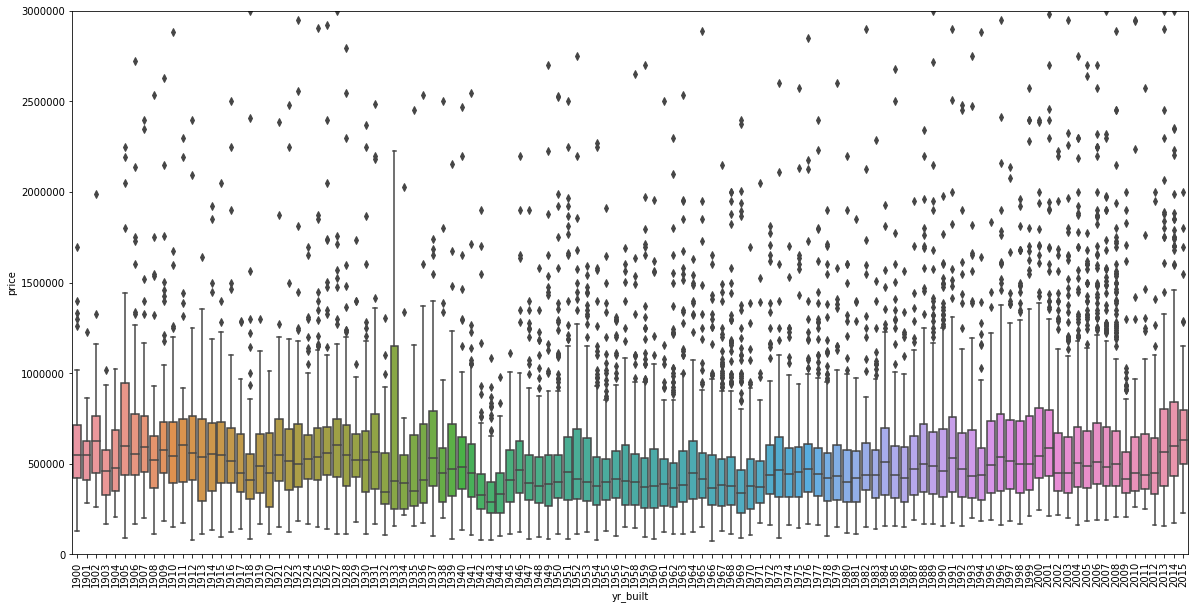

In [5]:
data = pd.concat([df['price'], df['yr_built']], axis =1)
print(type(data))
f, ax = plt.subplots(figsize = (20,10))
fig = sns.boxplot(x = df['yr_built'], y = df['price'], data = data)
fig.axis(ymin = 0, ymax = 3000000)
plt.xticks(rotation = 90)
plt.show()

# Preprocessing
## Normal distribution of Price (Target feature)
<li> I did this to figure if the data in the feature needed transformation of any sorts.
<li> Turns out it does need transformation (normalization).

Skewness: 4.024069
Kurtosis: 34.585540


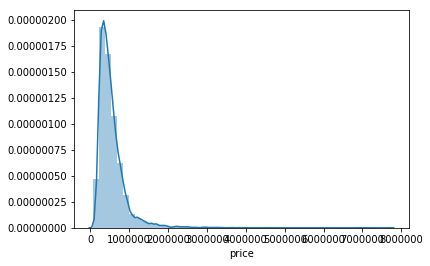

In [6]:
sns.distplot(df['price'])
print("Skewness: %f" %df['price'].skew())
print("Kurtosis: %f" %df['price'].kurt())

## Correlation Matrix
<li> Now, to quicken the process of finding correlations between 'price' and all other features, I used correlation matrix and fed it to heatmap to delineate the significance of respective features on'price'.
<li> I used the <code>nlargest()</code> function for the ordering to take place w.r.t. 'price', keeping 'price' as the index for the plot.
<li> Here, I have taken the top 15 correlated features into a variable named <code>cols</code>.

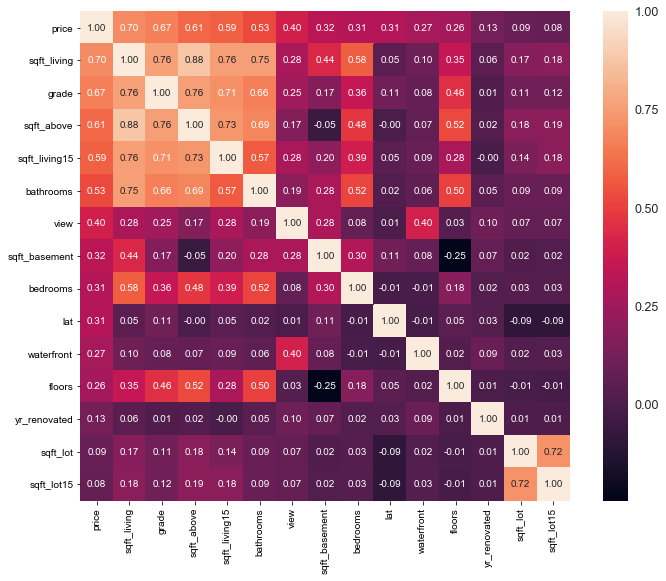

In [7]:
k = 15
corrmat = df.corr()
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize = (12,9)) #defining figure size
sns.set(font_scale = 1.25) #font size
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Revoking the dataframe with the top correlated features.

In [8]:
df = df[cols]

## Normalizing significant features with significant range and variance.
<li> Using <code>np.log()</code> transformations for normalization and commiting the changes.
<li> I have used <code>probplot()</code> to determine linear fit (normal)
<li> The <code>graph()</code> definition plots graphs for the features passed to it as arguments.

In [9]:
def graph(feature):
    sns.distplot(feature, fit = norm)
    fig = plt.figure()
    res = probplot(feature, plot = plt)

Plot before normalizing: 


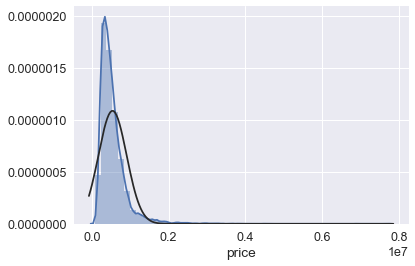

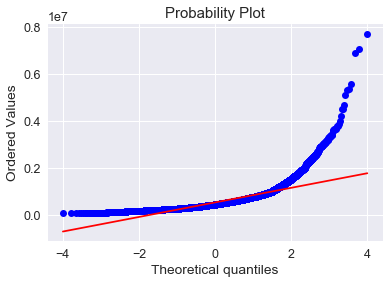

In [10]:
print("Plot before normalizing: ")
graph(df['price'])

Plot after normalizing: 


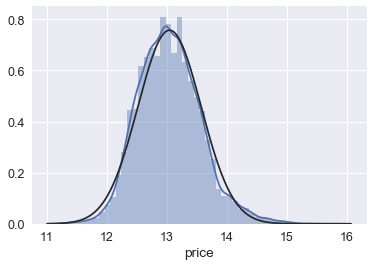

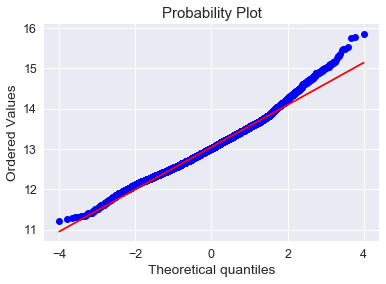

In [11]:
df['price'] = np.log(df['price'])
print("Plot after normalizing: ")
graph(df['price'])

Plot before normalizing: 


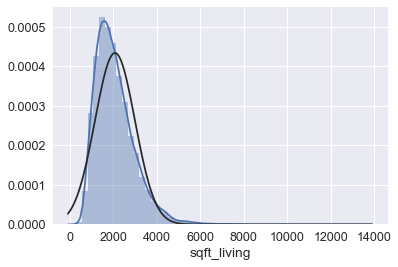

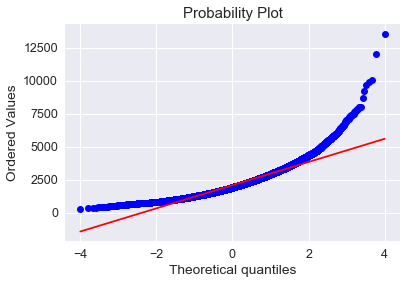

In [12]:
print("Plot before normalizing: ")
graph(df['sqft_living'])

Plot after normalizing: 


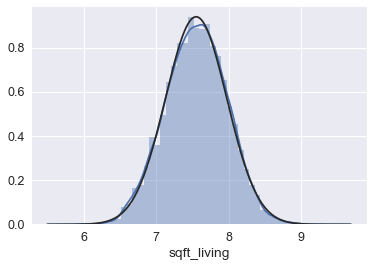

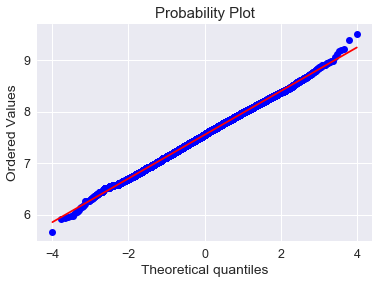

In [13]:
df['sqft_living'] = np.log(df['sqft_living'])
print("Plot after normalizing: ")
graph(df['sqft_living'])

Plot before normalizing: 


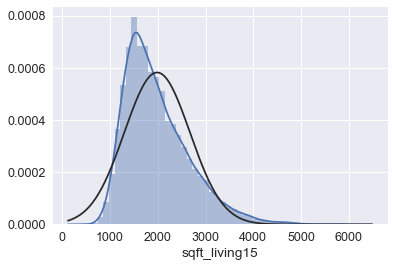

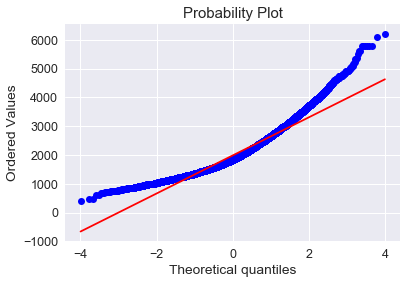

In [14]:
print("Plot before normalizing: ")
graph(df['sqft_living15'])

Plot after normalizing: 


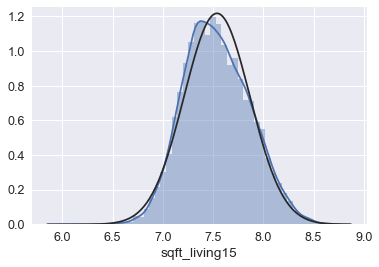

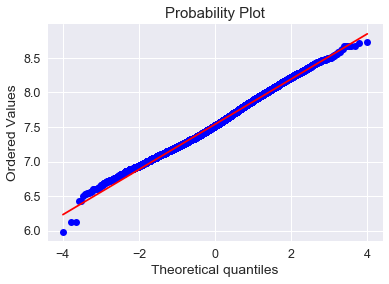

In [15]:
df['sqft_living15'] = np.log(df['sqft_living15'])
print("Plot after normalizing: ")
graph(df['sqft_living15'])

Plot before normalizing: 


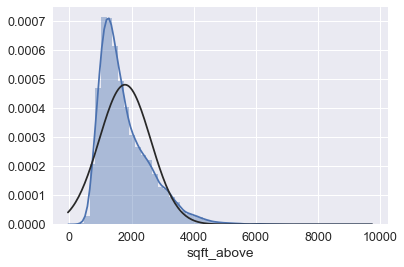

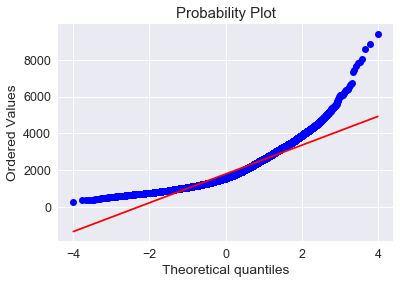

In [16]:
print("Plot before normalizing: ")
graph(df['sqft_above'])

Plot after normalizing: 


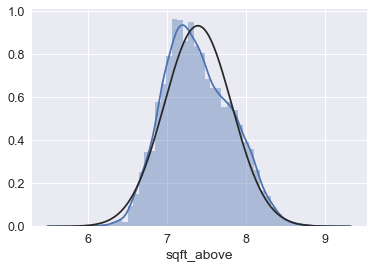

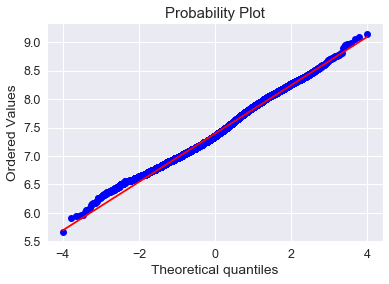

In [17]:
df['sqft_above'] = np.log(df['sqft_above'])
print("Plot after normalizing: ")
graph(df['sqft_above'])

Plot before normalizing: 


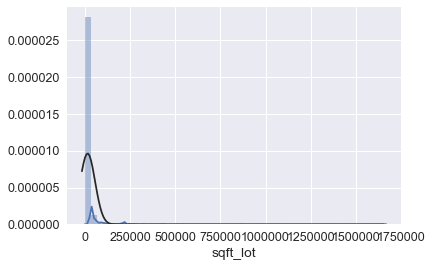

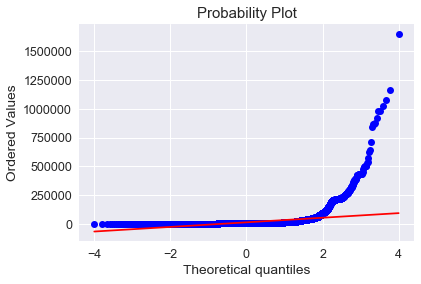

In [18]:
print("Plot before normalizing: ")
graph(df['sqft_lot'])

Plot after normalizing: 


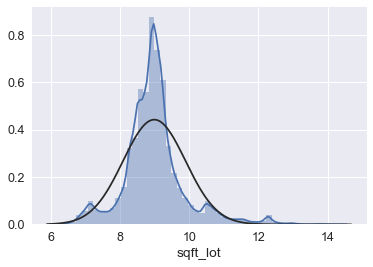

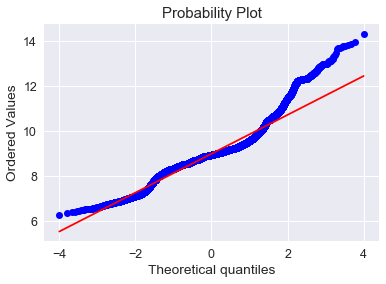

In [19]:
df['sqft_lot'] = np.log(df['sqft_lot'])
print("Plot after normalizing: ")
graph(df['sqft_lot'])

Plot before normalizing: 


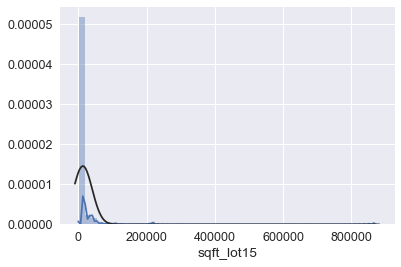

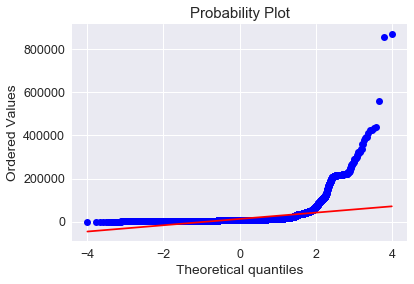

In [20]:
print("Plot before normalizing: ")
graph(df['sqft_lot15'])

Plot after normalizing: 


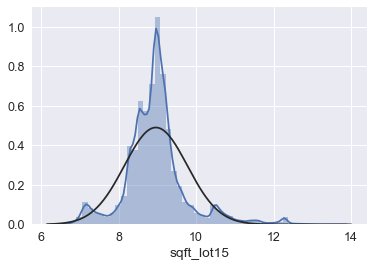

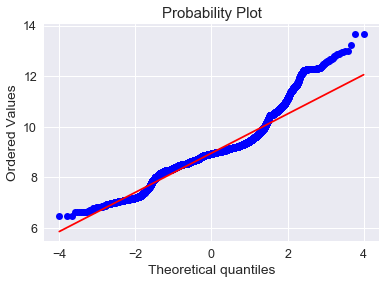

In [21]:
df['sqft_lot15'] = np.log(df['sqft_lot15'])
print("Plot after normalizing: ")
graph(df['sqft_lot15'])

## Defining 'X' and 'y'
<li> Allocating 'price' to 'y'.
<li> Allocating all the features of the dataframe to 'X' and then dropping 'price' (target variable).

In [22]:
y = df.iloc[:, 0:1]
X = df.iloc[:,:]
X.drop('price', axis = 1, inplace = True)

# End of preprocessing and data exploration.

# Splitting the normalized input (X) and normalized target (y).
<li> Splitting into training and testing is needed to train the algorithm and then generate the desired output.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Scoring function
<li> I used <code>make_scorer</code> to return a score to <code>cross_val_score</code> for it to return the k-fold cross validation score.
<li> The <code>greater_is_better</code> is set to false to get sign-flipped data in <code>scorer</code> object.
<li> Cross validation is the technique which assesses how the results of a single analysis adapts to an independent dataset.
<li> I used cross validation to evaluate Mean Squared Error (MSE).
<li> The <code>r2_scorer</code> definition evaluates the r^2 score for the passed prediction.

In [24]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def mse_cv_test(model):
    mse= -cross_val_score(model, X_test, y_test, scoring = scorer, cv = 5)
    return(mse)

def r2_scorer(pred):
    r2 = r2_score(y_test, pred)
    print("R2 Score: %.3f" %r2)

# Lasso
<li> Used the given alpha values for Lasso, iterated it for about 50000 iterations.

In [25]:
lasso = LassoCV(alphas = [0.001, 0.01, 0.1, 1, 2], max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)
y_test_las = lasso.predict(X_test)
r2_scorer(y_test_las)

Best alpha : 0.001
R2 Score: 0.749


In [26]:
print("Lasso MSE on Test set : %.3f" %(mse_cv_test(lasso).mean()))

Lasso MSE on Test set : 0.073


# Kernalized Ridge Regression

Linear

In [27]:
lkrr = KernelRidge(kernel = 'linear', gamma = None, degree = None, coef0 = 1, kernel_params = None, alpha = 1)
lkrr.fit(X_train, y_train)
lkrr_pred = lkrr.predict(X_test)
r2_scorer(lkrr_pred)

R2 Score: 0.649


In [28]:
print("Linear KRR MSE on Test set : %.3f" %(mse_cv_test(lkrr).mean()))

Linear KRR MSE on Test set : 0.102


## GridSearchCV
<li> I used <code>GridSearchCV</code> to perform exhaustive search over the specified parameter values for the respective estimator.


Polynomial

In [29]:
pkrr = GridSearchCV(KernelRidge(kernel = 'polynomial', coef0 = 1, gamma = 1), cv = 5, param_grid = {'degree':[2,4,7]})
pkrr.fit(X_train, y_train)
pkrr_pred = pkrr.predict(X_test)
r2_scorer(pkrr_pred)

R2 Score: 0.744


In [30]:
print("Polynomial KRR MSE on Test set : %.3f" %(mse_cv_test(pkrr).mean()))

Polynomial KRR MSE on Test set : 0.068


Gaussian

In [31]:
gkrr = GridSearchCV(KernelRidge(kernel = 'rbf'), cv = 5, param_grid = {'gamma':[0.1,0.5,1,2,4]}) #find best hyper_param
gkrr.fit(X_train, y_train)
gkrr_pred = gkrr.predict(X_test)
r2_scorer(gkrr_pred)

R2 Score: -26.433


In [32]:
print("Gaussian KRR MSE on Test set : %.3f" %(mse_cv_test(gkrr).mean()))

Gaussian KRR MSE on Test set : 16.458


# Ordinary Least Square
<li> OLS is used in Linear Regression to evaluate the linear  regression coefficients.

In [33]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
Linear_pred = ols.predict(X_test)
r2_scorer(Linear_pred)

R2 Score: 0.750


In [34]:
print("OLS MSE on Test set : %.3f" %(mse_cv_test(ols).mean()))

OLS MSE on Test set : 0.072


======================
# INFERENCE
======================

In [35]:
print("As seen from the R2 scores obtained for each model, it can be inferred that Linear Regression is the best model for the given data, and the preprocessing done in this code.")

As seen from the R2 scores obtained for each model, it can be inferred that Linear Regression is the best model for the given data, and the preprocessing done in this code.
